In [ ]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import pandas as pd
from sklearn import datasets, linear_model
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import seaborn as sns
%matplotlib inline

In [ ]:
df = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/00383/risk_factors_cervical_cancer.csv',na_values='?')
pd.set_option('display.max_rows', None, 'display.max_columns', None)
df.head(10)

,Age,Number of sexual partners,First sexual intercourse,Num of pregnancies,Smokes,Smokes (years),Smokes (packs/year),Hormonal Contraceptives,Hormonal Contraceptives (years),IUD,IUD (years),STDs,STDs (number),STDs:condylomatosis,STDs:cervical condylomatosis,STDs:vaginal condylomatosis,STDs:vulvo-perineal condylomatosis,STDs:syphilis,STDs:pelvic inflammatory disease,STDs:genital herpes,STDs:molluscum contagiosum,STDs:AIDS,STDs:HIV,STDs:Hepatitis B,STDs:HPV,STDs: Number of diagnosis,STDs: Time since first diagnosis,STDs: Time since last diagnosis,Dx:Cancer,Dx:CIN,Dx:HPV,Dx,Hinselmann,Schiller,Citology,Biopsy
0,18,4.0,15.0,1.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,NaN,NaN,0,0,0,0,0,0,0,0
1,15,1.0,14.0,1.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,NaN,NaN,0,0,0,0,0,0,0,0
2,34,1.0,NaN,1.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,NaN,NaN,0,0,0,0,0,0,0,0
3,52,5.0,16.0,4.0,1.0,37.000000,37.0,1.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,NaN,NaN,1,0,1,0,0,0,0,0
4,46,3.0,21.0,4.0,0.0,0.000000,0.0,1.0,15.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,NaN,NaN,0,0,0,0,0,0,0,0
5,42,3.0,23.0,2.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,NaN,NaN,0,0,0,0,0,0,0,0
6,51,3.0,17.0,6.0,1.0,34.000000,3.4,0.0,0.0,1.0,7.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,NaN,NaN,0,0,0,0,1,1,0,1
7,26,1.0,26.0,3.0,0.0,0.000000,0.0,1.0,2.0,1.0,7.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,NaN,NaN,0,0,0,0,0,0,0,0
8,45,1.0,20.0,5.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,NaN,NaN,1,0,1,1,0,0,0,0
9,44,3.0,15.0,NaN,1.0,1.266973,2.8,0.0,0.0,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,NaN,NaN,0,0,0,0,0,0,0,0


In [ ]:
df.isnull().sum()

Age                                     0
Number of sexual partners              26
First sexual intercourse                7
Num of pregnancies                     56
Smokes                                 13
Smokes (years)                         13
Smokes (packs/year)                    13
Hormonal Contraceptives               108
Hormonal Contraceptives (years)       108
IUD                                   117
IUD (years)                           117
STDs                                  105
STDs (number)                         105
STDs:condylomatosis                   105
STDs:cervical condylomatosis          105
STDs:vaginal condylomatosis           105
STDs:vulvo-perineal condylomatosis    105
STDs:syphilis                         105
STDs:pelvic inflammatory disease      105
STDs:genital herpes                   105
STDs:molluscum contagiosum            105
STDs:AIDS                             105
STDs:HIV                              105
STDs:Hepatitis B                  

Drop the two data which have too much NaN 

In [ ]:
df= df.drop(['STDs: Time since first diagnosis','STDs: Time since last diagnosis'],axis=1)

In [ ]:
df['Biopsy'] =df['Biopsy']+df['Citology']+df['Schiller']+df['Hinselmann']

df.rename(columns={'Biopsy':'result'}, inplace=True)

/usr/local/lib/python3.8/dist-packages/seaborn/categorical.py:3717: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/seaborn/categorical.py:3717: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
/usr/local/lib/py

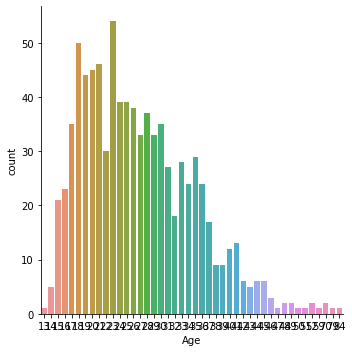

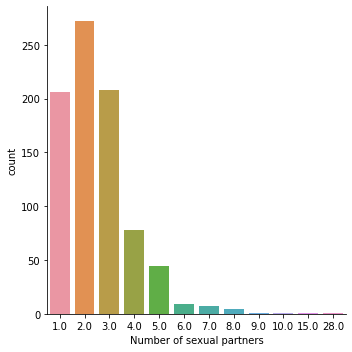

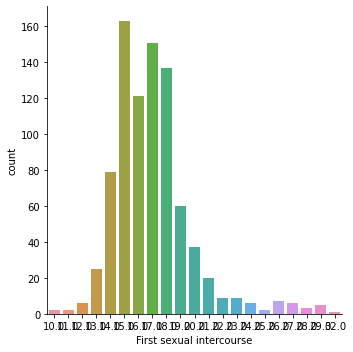

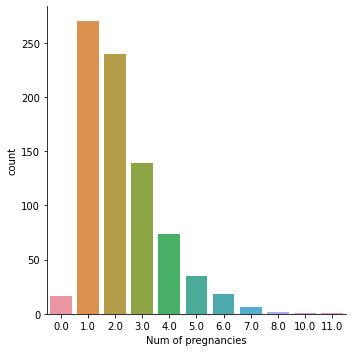

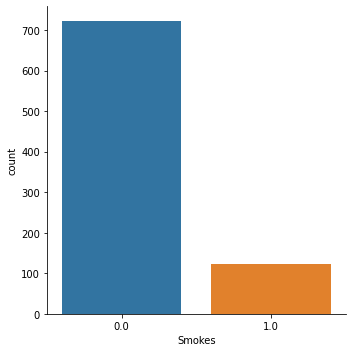

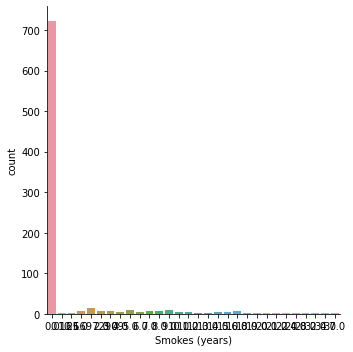

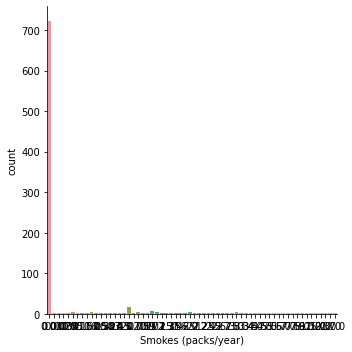

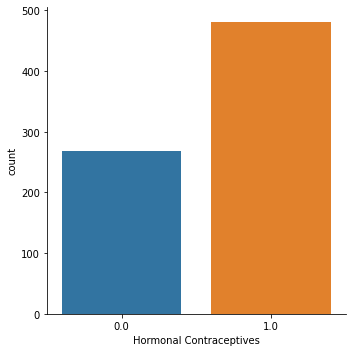

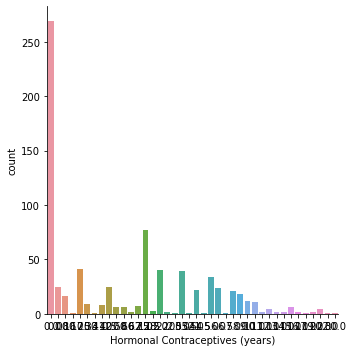

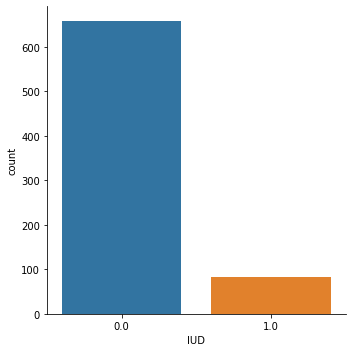

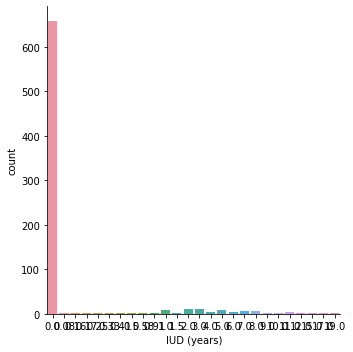

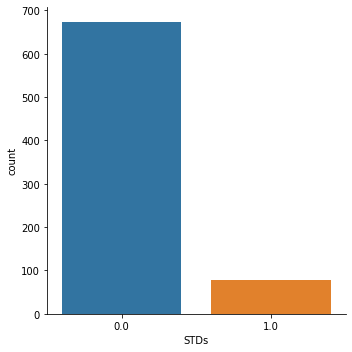

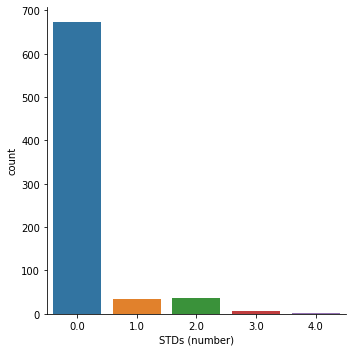

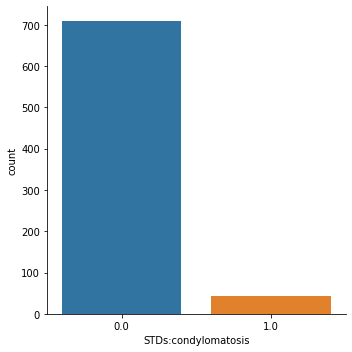

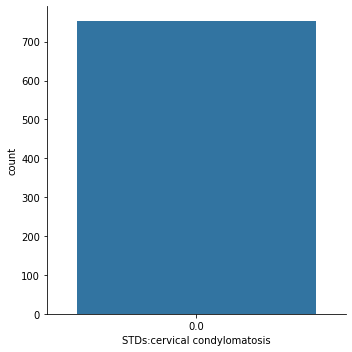

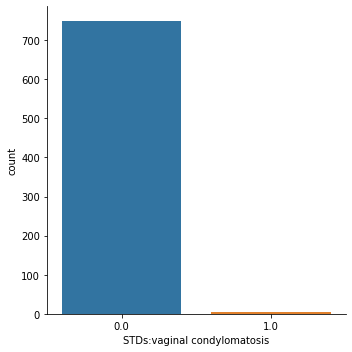

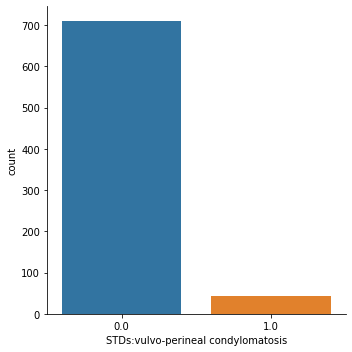

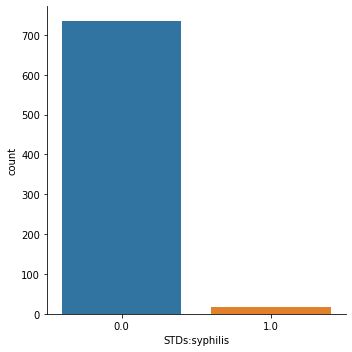

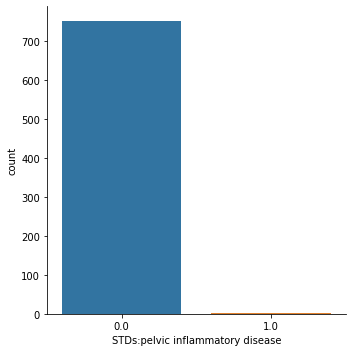

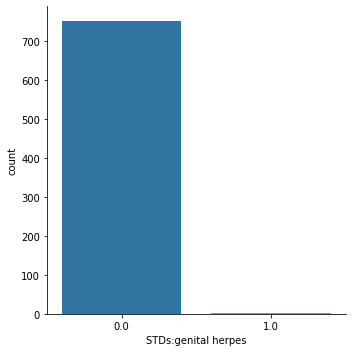

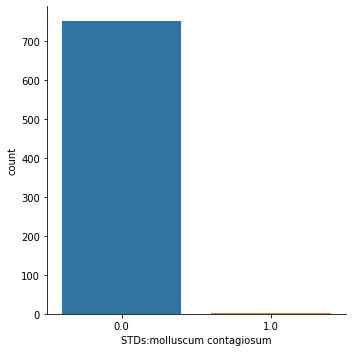

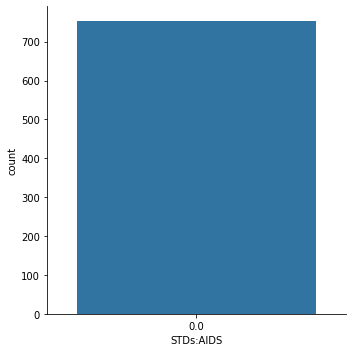

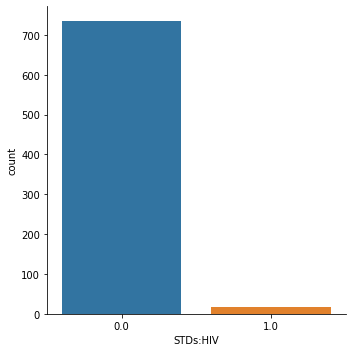

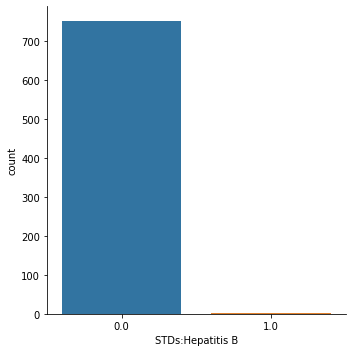

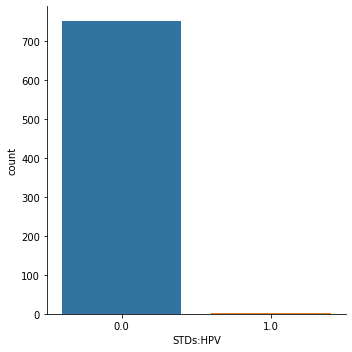

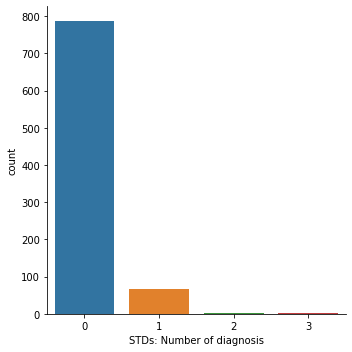

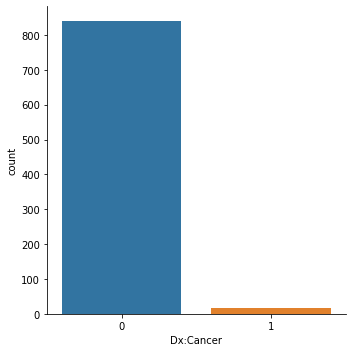

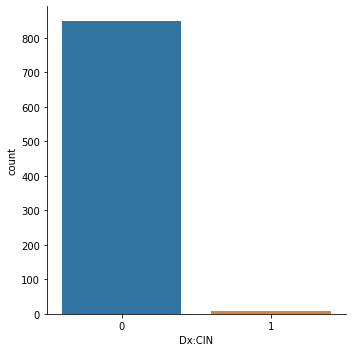

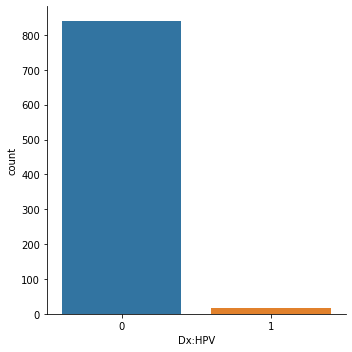

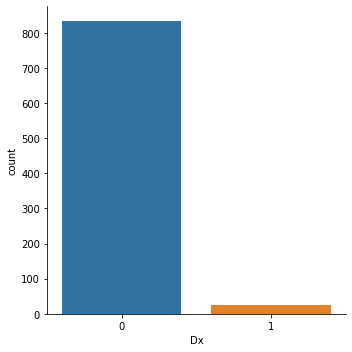

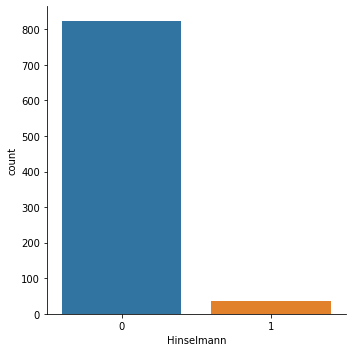

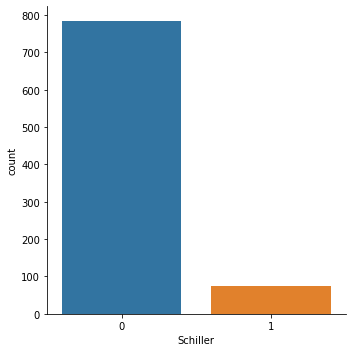

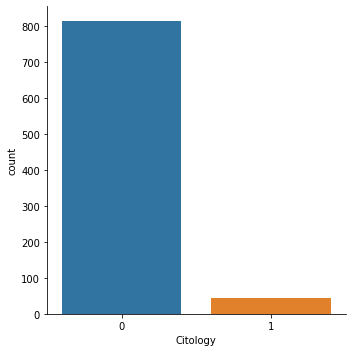

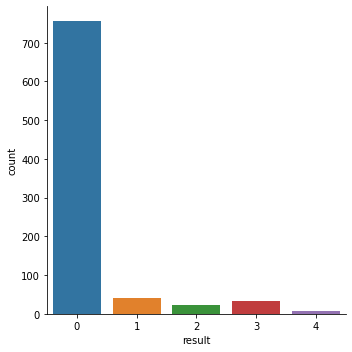

In [ ]:
for feature in df:
   sns.factorplot(feature,data=df,kind='count')

In [ ]:
df= df.drop(['Hinselmann','Schiller','Citology'],axis=1)

df= df.drop(['Dx:Cancer'],axis=1)

In [ ]:
df = df.apply(pd.to_numeric)

In [ ]:
df.mean()

Age                                   26.820513
Number of sexual partners              2.527644
First sexual intercourse              16.995300
Num of pregnancies                     2.275561
Smokes                                 0.145562
Smokes (years)                         1.219721
Smokes (packs/year)                    0.453144
Hormonal Contraceptives                0.641333
Hormonal Contraceptives (years)        2.256419
IUD                                    0.112011
IUD (years)                            0.514804
STDs                                   0.104914
STDs (number)                          0.176627
STDs:condylomatosis                    0.058433
STDs:cervical condylomatosis           0.000000
STDs:vaginal condylomatosis            0.005312
STDs:vulvo-perineal condylomatosis     0.057105
STDs:syphilis                          0.023904
STDs:pelvic inflammatory disease       0.001328
STDs:genital herpes                    0.001328
STDs:molluscum contagiosum             0

In [ ]:
df.median()

Age                                   25.0
Number of sexual partners              2.0
First sexual intercourse              17.0
Num of pregnancies                     2.0
Smokes                                 0.0
Smokes (years)                         0.0
Smokes (packs/year)                    0.0
Hormonal Contraceptives                1.0
Hormonal Contraceptives (years)        0.5
IUD                                    0.0
IUD (years)                            0.0
STDs                                   0.0
STDs (number)                          0.0
STDs:condylomatosis                    0.0
STDs:cervical condylomatosis           0.0
STDs:vaginal condylomatosis            0.0
STDs:vulvo-perineal condylomatosis     0.0
STDs:syphilis                          0.0
STDs:pelvic inflammatory disease       0.0
STDs:genital herpes                    0.0
STDs:molluscum contagiosum             0.0
STDs:AIDS                              0.0
STDs:HIV                               0.0
STDs:Hepati

In [ ]:
df.head(20)

,Age,Number of sexual partners,First sexual intercourse,Num of pregnancies,Smokes,Smokes (years),Smokes (packs/year),Hormonal Contraceptives,Hormonal Contraceptives (years),IUD,IUD (years),STDs,STDs (number),STDs:condylomatosis,STDs:cervical condylomatosis,STDs:vaginal condylomatosis,STDs:vulvo-perineal condylomatosis,STDs:syphilis,STDs:pelvic inflammatory disease,STDs:genital herpes,STDs:molluscum contagiosum,STDs:AIDS,STDs:HIV,STDs:Hepatitis B,STDs:HPV,STDs: Number of diagnosis,Dx:CIN,Dx:HPV,Dx,result
0,18,4.0,15.0,1.0,0.0,0.000000,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0
1,15,1.0,14.0,1.0,0.0,0.000000,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0
2,34,1.0,NaN,1.0,0.0,0.000000,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0
3,52,5.0,16.0,4.0,1.0,37.000000,37.0,1.0,3.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,1,0,0
4,46,3.0,21.0,4.0,0.0,0.000000,0.0,1.0,15.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0
5,42,3.0,23.0,2.0,0.0,0.000000,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0
6,51,3.0,17.0,6.0,1.0,34.000000,3.4,0.0,0.00,1.0,7.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,3
7,26,1.0,26.0,3.0,0.0,0.000000,0.0,1.0,2.00,1.0,7.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0
8,45,1.0,20.0,5.0,0.0,0.000000,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,1,1,0
9,44,3.0,15.0,NaN,1.0,1.266973,2.8,0.0,0.00,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0


In [ ]:
####filling NaN values with median for continous variables and 0/1 for discrete variables.

df['Smokes'] = df['Smokes'].fillna(1)
df['Hormonal Contraceptives'] = df['Hormonal Contraceptives'].fillna(1)
df['STDs'] = df['STDs'].fillna(1)

# df['IUD'] = df['IUD'].fillna(0)
# df['IUD (years)'] = df['IUD (years)'].fillna(0)

In [ ]:
df = df.fillna(df.median())

In [ ]:
df.head(30)

,Age,Number of sexual partners,First sexual intercourse,Num of pregnancies,Smokes,Smokes (years),Smokes (packs/year),Hormonal Contraceptives,Hormonal Contraceptives (years),IUD,IUD (years),STDs,STDs (number),STDs:condylomatosis,STDs:cervical condylomatosis,STDs:vaginal condylomatosis,STDs:vulvo-perineal condylomatosis,STDs:syphilis,STDs:pelvic inflammatory disease,STDs:genital herpes,STDs:molluscum contagiosum,STDs:AIDS,STDs:HIV,STDs:Hepatitis B,STDs:HPV,STDs: Number of diagnosis,Dx:CIN,Dx:HPV,Dx,result
0,18,4.0,15.0,1.0,0.0,0.000000,0.00,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0
1,15,1.0,14.0,1.0,0.0,0.000000,0.00,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0
2,34,1.0,17.0,1.0,0.0,0.000000,0.00,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0
3,52,5.0,16.0,4.0,1.0,37.000000,37.00,1.0,3.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,1,0,0
4,46,3.0,21.0,4.0,0.0,0.000000,0.00,1.0,15.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0
5,42,3.0,23.0,2.0,0.0,0.000000,0.00,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0
6,51,3.0,17.0,6.0,1.0,34.000000,3.40,0.0,0.00,1.0,7.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,3
7,26,1.0,26.0,3.0,0.0,0.000000,0.00,1.0,2.00,1.0,7.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0
8,45,1.0,20.0,5.0,0.0,0.000000,0.00,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,1,1,0
9,44,3.0,15.0,2.0,1.0,1.266973,2.80,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0


In [ ]:
df.isnull().sum()

Age                                   0
Number of sexual partners             0
First sexual intercourse              0
Num of pregnancies                    0
Smokes                                0
Smokes (years)                        0
Smokes (packs/year)                   0
Hormonal Contraceptives               0
Hormonal Contraceptives (years)       0
IUD                                   0
IUD (years)                           0
STDs                                  0
STDs (number)                         0
STDs:condylomatosis                   0
STDs:cervical condylomatosis          0
STDs:vaginal condylomatosis           0
STDs:vulvo-perineal condylomatosis    0
STDs:syphilis                         0
STDs:pelvic inflammatory disease      0
STDs:genital herpes                   0
STDs:molluscum contagiosum            0
STDs:AIDS                             0
STDs:HIV                              0
STDs:Hepatitis B                      0
STDs:HPV                              0


In [ ]:
df.describe()

,Age,Number of sexual partners,First sexual intercourse,Num of pregnancies,Smokes,Smokes (years),Smokes (packs/year),Hormonal Contraceptives,Hormonal Contraceptives (years),IUD,IUD (years),STDs,STDs (number),STDs:condylomatosis,STDs:cervical condylomatosis,STDs:vaginal condylomatosis,STDs:vulvo-perineal condylomatosis,STDs:syphilis,STDs:pelvic inflammatory disease,STDs:genital herpes,STDs:molluscum contagiosum,STDs:AIDS,STDs:HIV,STDs:Hepatitis B,STDs:HPV,STDs: Number of diagnosis,Dx:CIN,Dx:HPV,Dx,result
count,858.000000,858.000000,858.000000,858.000000,858.000000,858.000000,858.000000,858.000000,858.000000,858.000000,858.000000,858.000000,858.000000,858.000000,858.0,858.000000,858.000000,858.000000,858.000000,858.000000,858.000000,858.0,858.000000,858.000000,858.000000,858.000000,858.000000,858.000000,858.000000,858.000000
mean,26.820513,2.511655,16.995338,2.257576,0.158508,1.201241,0.446278,0.686480,2.035331,0.096737,0.444604,0.214452,0.155012,0.051282,0.0,0.004662,0.050117,0.020979,0.001166,0.001166,0.001166,0.0,0.020979,0.001166,0.002331,0.087413,0.010490,0.020979,0.027972,0.242424
std,8.497948,1.644759,2.791883,1.400981,0.365430,4.060623,2.210351,0.464194,3.567040,0.295771,1.814218,0.410681,0.529617,0.220701,0.0,0.068159,0.218313,0.143398,0.034139,0.034139,0.034139,0.0,0.143398,0.034139,0.048252,0.302545,0.101939,0.143398,0.164989,0.741797
min,13.000000,1.000000,10.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,20.000000,2.000000,15.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,25.000000,2.000000,17.000000,2.000000,0.000000,0.000000,0.000000,1.000000,0.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,32.000000,3.000000,18.000000,3.000000,0.000000,0.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,84.000000,28.000000,32.000000,11.000000,1.000000,37.000000,37.000000,1.000000,30.000000,1.000000,19.000000,1.000000,4.000000,1.000000,0.0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.0,1.000000,1.000000,1.000000,3.000000,1.000000,1.000000,1.000000,4.000000


In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

X = df.drop('result', axis=1)
y = df["result"]

X = StandardScaler().fit_transform(X)

pca = PCA(0.80)  


prin_comp = pca.fit_transform(X)
principalDf = pd.DataFrame(data = prin_comp)


# print(principalDf)

# print('\nEigenvalues \n%s' %pca.explained_variance_)
# print('Eigenvectors \n%s' %pca.components_)

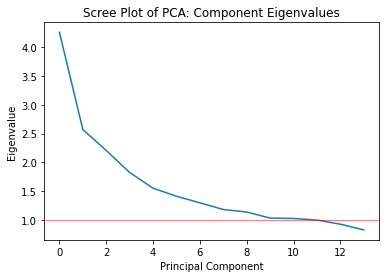

In [ ]:
def scree_plot():
    from matplotlib.pyplot import figure, show
    from matplotlib.ticker import MaxNLocator

    ax = figure().gca()
    ax.plot(pca.explained_variance_)
    ax.xaxis.set_major_locator(MaxNLocator(integer=True))
    plt.xlabel('Principal Component')
    plt.ylabel('Eigenvalue')
    plt.axhline(y=1, linewidth=1, color='r', alpha=0.5)
    plt.title('Scree Plot of PCA: Component Eigenvalues')
    show()

scree_plot()


In [ ]:
finalDf = pd.concat([principalDf, df[["result"]]], axis = 1)
finalDf.head(10)


,0,1,2,3,4,5,6,7,8,9,10,11,12,13,result
0,-0.729539,-1.163835,-0.811510,0.561348,-1.330633,0.044392,-0.504229,0.093071,-0.497117,0.043322,-0.417558,-0.027759,-0.710435,0.645595,0
1,-0.807355,-1.648641,-0.748701,0.561114,-1.385829,0.094115,-0.341750,0.312211,-0.150645,-0.410235,0.112981,-0.123015,0.392203,0.072351,0
2,-0.806121,-0.831080,-0.006781,0.022056,-0.836074,0.662796,0.976372,0.026537,-0.624643,-0.092260,0.088891,-0.305015,-0.055869,-0.212902,0
3,1.291172,14.667139,-6.663799,4.018020,-0.012908,3.895324,0.127295,0.990554,0.181547,0.488255,1.216339,0.330660,0.811337,-2.468500,0
4,-0.801913,1.572663,1.405849,-1.680918,3.069216,0.288688,1.196403,-0.800689,0.334991,0.042695,-0.594223,0.264905,-0.529487,0.548882,0
5,-0.754012,-0.017517,0.554610,-0.429171,-0.261348,1.263425,2.187352,-0.320671,-1.272711,0.405361,-0.198100,-0.373511,-1.117976,-0.189680,0
6,0.637244,8.338558,-0.615277,-2.085601,-3.476147,0.572581,0.479135,0.253623,-0.814375,0.211969,1.067861,-0.332098,0.527717,-1.173006,3
7,-0.686302,1.164722,3.291866,-2.378455,-1.641922,0.633898,0.819882,1.176615,0.968199,0.337360,0.656445,-0.100781,0.620678,-1.631083,0
8,-1.016049,2.594876,4.709203,5.334940,0.722125,1.604477,1.501291,0.987954,-2.314637,-0.709875,0.081361,-0.527658,-0.256349,0.972743,0
9,-0.338574,1.684004,-1.313040,0.107084,-0.900343,0.470153,0.484247,-0.373798,-1.059790,0.105281,-0.058449,-0.298448,-0.645177,0.072505,0


In [ ]:

from sklearn import preprocessing # preprossing is what we do with the data before we run the learning algorithm
from sklearn.model_selection import train_test_split 
import math

import matplotlib.pyplot as plt

# print(finalDf.shape)
X = finalDf.drop('result', axis=1)
y = finalDf["result"]

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=1)






print("direction1")
print("X_train shape: {}".format(X_train.shape))
print("y_train shape: {}".format(y_train.shape))

print("X_val shape: {}".format(X_val.shape))
print("y_val shape: {}".format(y_val.shape))


direction1
X_train shape: (686, 14)
y_train shape: (686,)
X_val shape: (172, 14)
y_val shape: (172,)


In [ ]:
import sklearn as sk
from sklearn.linear_model import LogisticRegression
import pandas as pd
import os


model = LogisticRegression()
model.fit(X_train, y_train)

result = model.score(X_train, y_train)
print("Logistic Regression")
print("training accuracy = "+"{:.6f}".format(result))


result = model.score(X_val, y_val)
print("validation accuracy = "+"{:.6f}".format(result))


Logistic Regression
training accuracy = 0.880466
validation accuracy = 0.872093


In [ ]:
from sklearn import svm
model_svm = svm.SVC()
model_svm.fit(X_train, y_train)
print("SVM")

result = model_svm.score(X_train, y_train)
print("training accuracy = "+"{:.6f}".format(result))

result = model_svm.score(X_val, y_val)
print("validation accuracy = "+"{:.6f}".format(result))

SVM
training accuracy = 0.886297
validation accuracy = 0.889535


In [ ]:
# Import MLPClassifer 
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score

# Create model object
clf = MLPClassifier(hidden_layer_sizes=(14,6),
                    random_state=5,
                    verbose=True,
                    learning_rate_init=0.01)

# Fit data onto the model
clf.fit(X_train,y_train)


Iteration 1, loss = 1.38888964
Iteration 2, loss = 1.04680728
Iteration 3, loss = 0.81128001
Iteration 4, loss = 0.67211601
Iteration 5, loss = 0.61655606
Iteration 6, loss = 0.58970388
Iteration 7, loss = 0.57249761
Iteration 8, loss = 0.55300387
Iteration 9, loss = 0.53589064
Iteration 10, loss = 0.52324885
Iteration 11, loss = 0.51076007
Iteration 12, loss = 0.50213416
Iteration 13, loss = 0.49426390
Iteration 14, loss = 0.48802810
Iteration 15, loss = 0.48193269
Iteration 16, loss = 0.47521122
Iteration 17, loss = 0.46891698
Iteration 18, loss = 0.46476057
Iteration 19, loss = 0.46092974
Iteration 20, loss = 0.45766079
Iteration 21, loss = 0.45355761
Iteration 22, loss = 0.45101773
Iteration 23, loss = 0.44754426
Iteration 24, loss = 0.44477230
Iteration 25, loss = 0.44167783
Iteration 26, loss = 0.43888316
Iteration 27, loss = 0.43772048
Iteration 28, loss = 0.43449821
Iteration 29, loss = 0.43281398
Iteration 30, loss = 0.43089071
Iteration 31, loss = 0.42937692
Iteration 32, los

/usr/local/lib/python3.8/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


MLPClassifier(hidden_layer_sizes=(14, 6), learning_rate_init=0.01,
              random_state=5, verbose=True)

In [ ]:
print("neural networks ")
y_in=clf.predict(X_train)
print("training accuracy = "+str(accuracy_score(y_train,y_in)))
ypred=clf.predict(X_val)
print("validation accuracy = "+str(accuracy_score(y_val,ypred)))


neural networks 
training accuracy = 0.9212827988338192
validation accuracy = 0.872093023255814
